In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('weatherHistory.csv')

In [ ]:
# Display available columns to understand data
print("Columns in dataset:\n", df.columns.tolist(), "\n")

Columns in dataset:
 ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary'] 



In [ ]:
# Select only numeric columns for clustering
X = df.select_dtypes(include=[np.number])

In [ ]:
# Drop rows with any missing numeric values
X = X.dropna()

In [ ]:
# Normalize (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply DBSCAN
# eps = neighborhood size, min_samples = minimum points to form a cluster
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

In [ ]:
# Add cluster labels to dataframe
df_clean = df.loc[X.index].copy()
df_clean['Cluster'] = labels

# Identify outliers (label = -1)
outliers = df_clean[df_clean['Cluster'] == -1]

In [ ]:
# Print cluster summary
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_outliers = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")
print(f"Total records used: {len(df_clean)}\n")

Number of clusters: 67
Number of outliers: 1844
Total records used: 96453



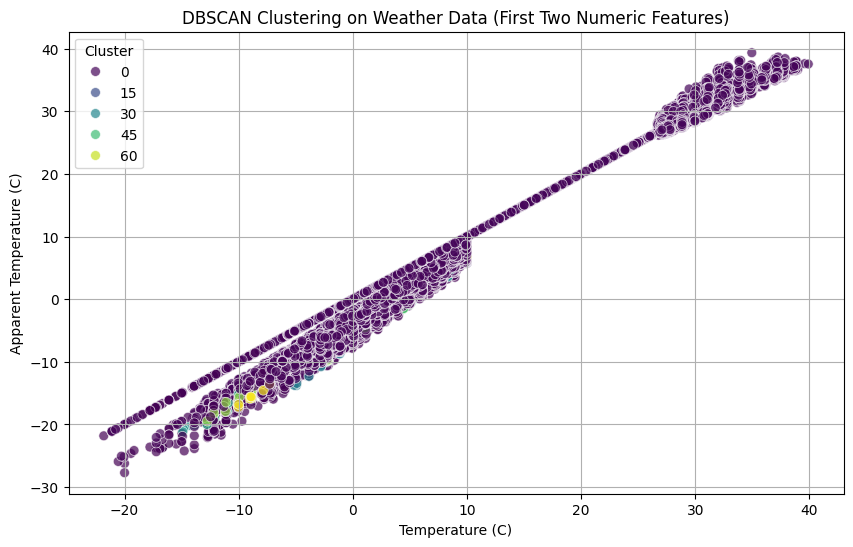

In [ ]:
# Plot first two numeric features (for visualization)
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X.iloc[:, 0], y=X.iloc[:, 1],
    hue=labels, palette="viridis", s=50, alpha=0.7
)
plt.title("DBSCAN Clustering on Weather Data (First Two Numeric Features)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

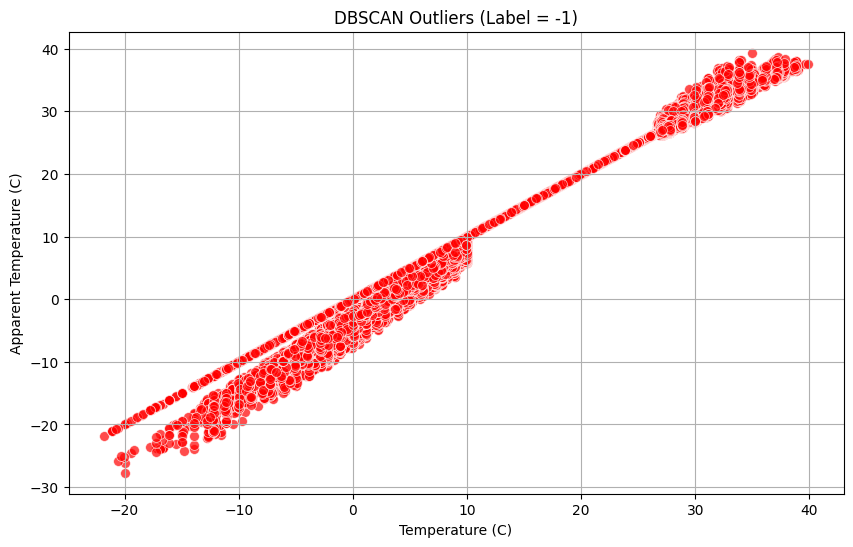

In [ ]:
# Plot outliers only (in red)
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X.iloc[:, 0], y=X.iloc[:, 1],
    data=outliers, color='red', s=50, alpha=0.7
)
plt.title("DBSCAN Outliers (Label = -1)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.grid(True)
plt.show()